#  Dataset Exploration & Preprocessing

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import pickle
import re

## Load the dataset

In [2]:
dataset = pd.read_csv('Datasets/dataset.csv')

## Display initial dataset information

In [3]:
print("Initial Dataset Preview:")
dataset.head(10)

Initial Dataset Preview:


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("\nDataset Size and Shape Before Cleaning:")
print(f"Size: {dataset.size}, Shape: {dataset.shape}")


Dataset Size and Shape Before Cleaning:
Size: 88560, Shape: (4920, 18)


## Data Cleaning and Preprocessing

## Checking and Handling Null values

In [5]:
print("\nNull Values Count in Each Column:")
print(dataset.isnull().sum())


Null Values Count in Each Column:
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64


### Missing Data Visualization

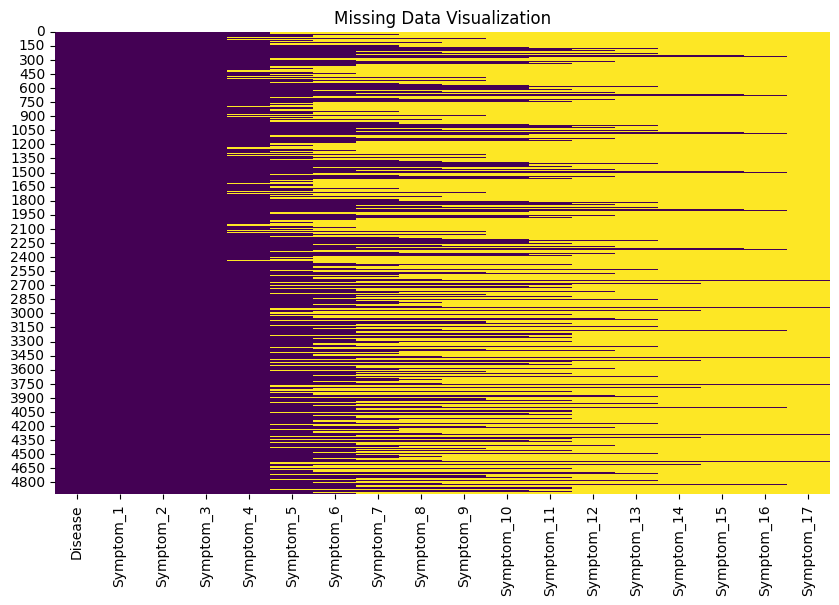

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

### Step 1: Drop columns with more than 70% missing values meaning simply having more than 3,444 missing or null values
#### Columns with excessive missing data (more than 70%) are unlikely to provide meaningful information.
#### Keeping them would dilute the dataset's quality and increase noise.

In [7]:
threshold = 0.7
dataset = dataset.loc[:, dataset.isnull().mean() < threshold]

print("\nShape After Dropping Columns with >70% Missing Values:")
print(f"Shape: {dataset.shape}")


Shape After Dropping Columns with >70% Missing Values:
Shape: (4920, 11)


### Step 2: Fill missing values in the remaining columns with the mode (most frequent value)
#### Since symptoms are categorical, replacing missing values with the mode is a logical choice.

In [8]:
for column in dataset.columns[1:]:  # Skip 'Disease' column as it has no missing values
    dataset[column] = dataset[column].fillna(dataset[column].mode()[0])

### Step 3: Drop rows with excessive missing values
#### Rows with too many missing symptoms provide incomplete information about a disease.
#### We drop rows that have fewer than 2 non-null symptom entries.

In [9]:
dataset = dataset.dropna(thresh=len(dataset.columns) - 2)

print("\nNull Values Count After Cleaning:")
print(dataset.isnull().sum())

print("\nDataset Size and Shape After Cleaning:")
print(f"Size: {dataset.size}, Shape: {dataset.shape}")


Null Values Count After Cleaning:
Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
dtype: int64

Dataset Size and Shape After Cleaning:
Size: 54120, Shape: (4920, 11)


In [10]:
dataset.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10'],
      dtype='object')

In [11]:
dataset.dtypes

Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
dtype: object

## Cleaning Symptom Names

In [12]:
def clean_symptom_name(symptom):
    if pd.isnull(symptom):
        return ''
    symptom = symptom.replace('_', ' ')  # Replace underscores with spaces
    return re.sub(r'\s+', ' ', symptom.strip().lower())  # Remove extra spaces, strip, and convert to lowercase


### Clean symptom names in all symptom columns

In [13]:
symptom_columns = [col for col in dataset.columns if col.startswith('Symptom_')]
for col in symptom_columns:
    dataset[col] = dataset[col].apply(clean_symptom_name)

In [14]:
dataset.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes
3,Fungal infection,itching,skin rash,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes
4,Fungal infection,itching,skin rash,nodal skin eruptions,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes
5,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes
6,Fungal infection,itching,nodal skin eruptions,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes
7,Fungal infection,itching,skin rash,dischromic patches,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes
8,Fungal infection,itching,skin rash,nodal skin eruptions,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes
9,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes


## Encoding Categorical Data

In [15]:
le = LabelEncoder()

### Encode the 'Disease' column

In [16]:
dataset['Disease'] = le.fit_transform(dataset['Disease'])

In [17]:
dataset['Disease']

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: Disease, Length: 4920, dtype: int32

### Encode all remaining columns

In [18]:
# Create a unified mapping for symptom names
symptoms = pd.unique(dataset.iloc[:, 1:].values.ravel('K'))  # Flatten and get unique values
symptoms = [symptom for symptom in symptoms if symptom != '']  # Remove empty strings
symptom_mappings = {symptom: idx for idx, symptom in enumerate(symptoms)}

print("\nSymptom Mappings:")
print(symptom_mappings)


Symptom Mappings:
{'itching': 0, 'skin rash': 1, 'continuous sneezing': 2, 'shivering': 3, 'stomach pain': 4, 'acidity': 5, 'vomiting': 6, 'indigestion': 7, 'muscle wasting': 8, 'patches in throat': 9, 'fatigue': 10, 'weight loss': 11, 'sunken eyes': 12, 'cough': 13, 'headache': 14, 'chest pain': 15, 'back pain': 16, 'weakness in limbs': 17, 'chills': 18, 'joint pain': 19, 'yellowish skin': 20, 'constipation': 21, 'pain during bowel movements': 22, 'breathlessness': 23, 'cramps': 24, 'weight gain': 25, 'mood swings': 26, 'neck pain': 27, 'muscle weakness': 28, 'stiff neck': 29, 'pus filled pimples': 30, 'burning micturition': 31, 'bladder discomfort': 32, 'high fever': 33, 'nodal skin eruptions': 34, 'ulcers on tongue': 35, 'loss of appetite': 36, 'restlessness': 37, 'dehydration': 38, 'dizziness': 39, 'weakness of one body side': 40, 'lethargy': 41, 'nausea': 42, 'abdominal pain': 43, 'pain in anal region': 44, 'sweating': 45, 'bruising': 46, 'cold hands and feets': 47, 'anxiety': 48

In [19]:
# Encode all symptom columns using the unified mapping
for column in dataset.columns[1:]:
    dataset[column] = dataset[column].map(symptom_mappings).fillna(-1).astype(int)  # Use -1 for missing values

In [20]:
dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10
0,15,0,1,34,55,14,42,43,43,79,79
1,15,1,34,55,33,14,42,43,43,79,79
2,15,0,34,55,33,14,42,43,43,79,79
3,15,0,1,55,33,14,42,43,43,79,79
4,15,0,1,34,33,14,42,43,43,79,79


### Saving the Encoder for inverse transforming

In [44]:
with open('Pickle files/label_encoder.pkl', 'wb') as le_file:
    pickle.dump(le, le_file)

## Detect and Remove Outliers

In [21]:
## Count the Number of Non-null Symptoms in Each Row
dataset['Symptom_Count'] = (dataset.iloc[:, 1:] != '').sum(axis=1)

In [22]:
# Verify the column is added
print("\nDataset with Symptom Count:")
print(dataset.head())


Dataset with Symptom Count:
   Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0       15          0          1         34         55         14         42   
1       15          1         34         55         33         14         42   
2       15          0         34         55         33         14         42   
3       15          0          1         55         33         14         42   
4       15          0          1         34         33         14         42   

   Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_Count  
0         43         43         79          79             10  
1         43         43         79          79             10  
2         43         43         79          79             10  
3         43         43         79          79             10  
4         43         43         79          79             10  


### Count the Number of Non-null Symptoms in Each Row

In [23]:
# Count the number of non-null symptoms in each row
dataset['Symptom_Count'] = (dataset.iloc[:, 1:] != '').sum(axis=1)

# Verify the column is added
print("\n## Dataset with Symptom Count:")
print(dataset.head())


## Dataset with Symptom Count:
   Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0       15          0          1         34         55         14         42   
1       15          1         34         55         33         14         42   
2       15          0         34         55         33         14         42   
3       15          0          1         55         33         14         42   
4       15          0          1         34         33         14         42   

   Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_Count  
0         43         43         79          79             11  
1         43         43         79          79             11  
2         43         43         79          79             11  
3         43         43         79          79             11  
4         43         43         79          79             11  


## Detect and Remove Outliers

In [24]:
# Calculate Z-scores for Symptom_Count
dataset['Symptom_Count_Z'] = zscore(dataset['Symptom_Count'])

# Identify outliers based on Z-score threshold (e.g., > 3 or < -3)
outliers = dataset[(dataset['Symptom_Count_Z'] > 3) | (dataset['Symptom_Count_Z'] < -3)]

print("Outliers Detected:")
print(outliers)

Outliers Detected:
Empty DataFrame
Columns: [Disease, Symptom_1, Symptom_2, Symptom_3, Symptom_4, Symptom_5, Symptom_6, Symptom_7, Symptom_8, Symptom_9, Symptom_10, Symptom_Count, Symptom_Count_Z]
Index: []


### Remove outliers

In [25]:
dataset = dataset[~dataset.index.isin(outliers.index)]

In [26]:
print(f"Dataset Shape After Removing Outliers: {len(dataset)} rows remaining.")

Dataset Shape After Removing Outliers: 4920 rows remaining.


## Outlier Detection Visualization

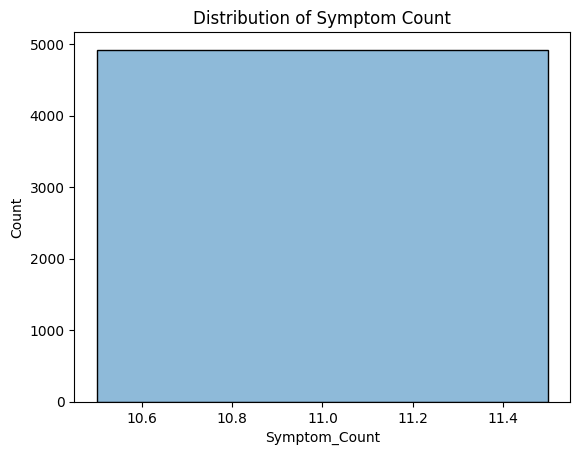

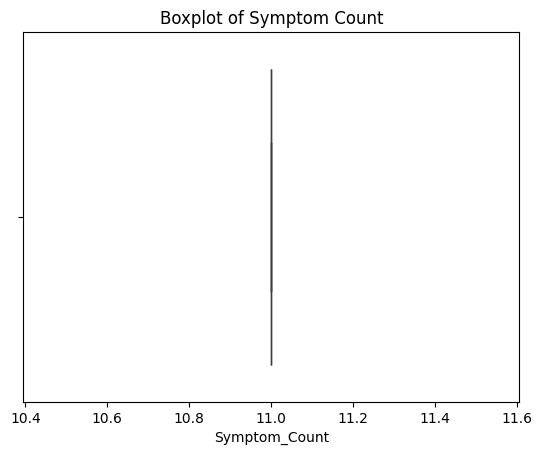

In [27]:
sns.histplot(dataset['Symptom_Count'], kde=True)
plt.title('Distribution of Symptom Count')
plt.show()

sns.boxplot(x=dataset['Symptom_Count'])
plt.title('Boxplot of Symptom Count')
plt.show()

## Class Distribution Visualization (Disease)

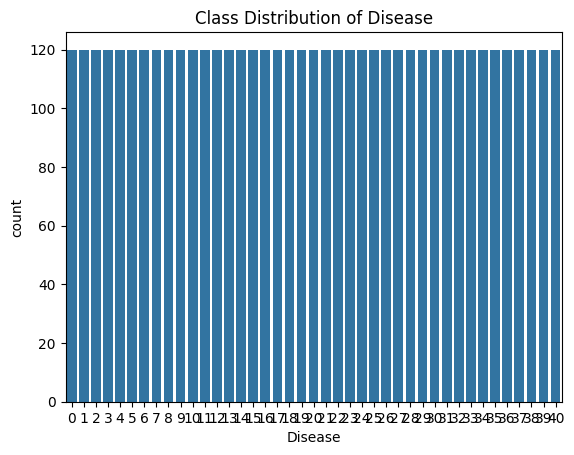

In [28]:
sns.countplot(x='Disease', data=dataset)
plt.title('Class Distribution of Disease')
plt.show()

## Correlation Heatmap

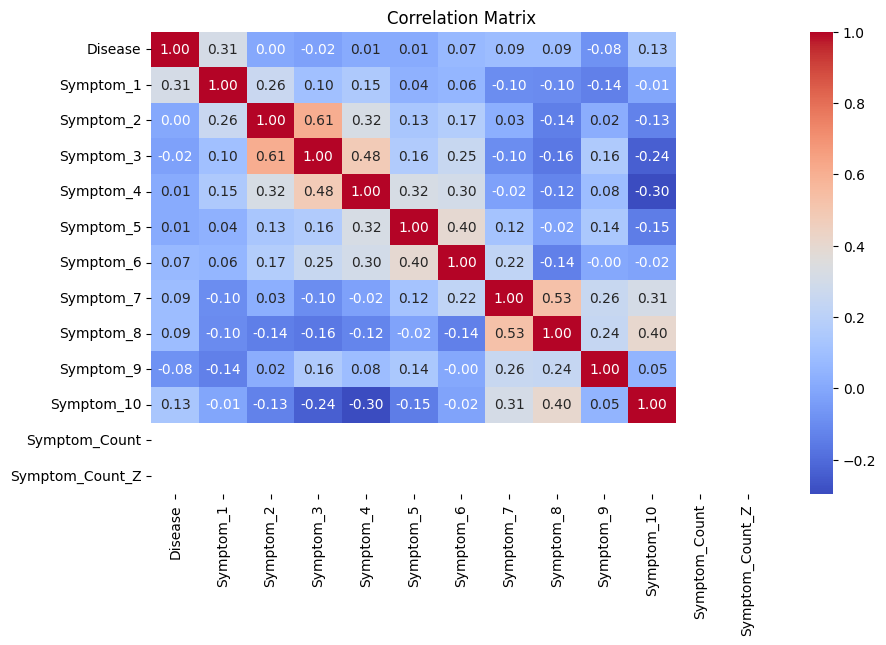

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Categorical Feature Visualization

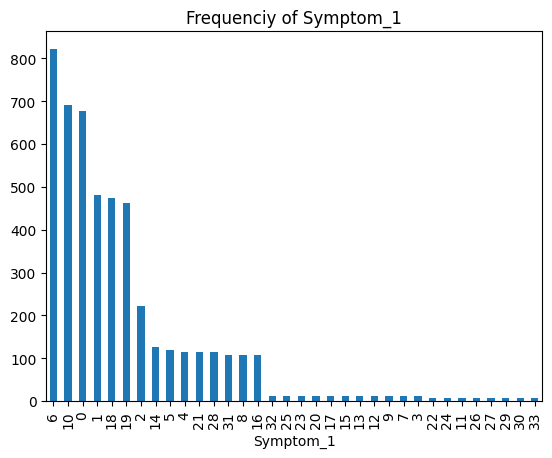

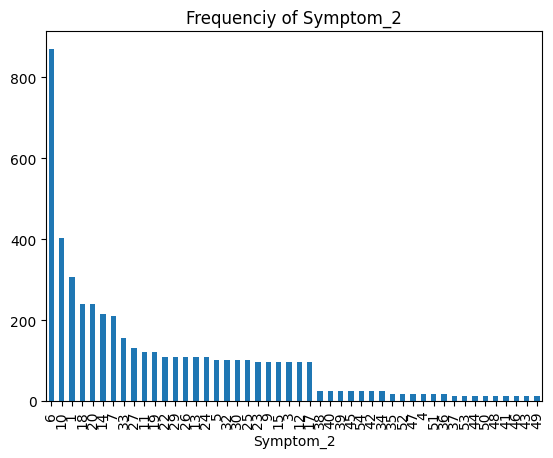

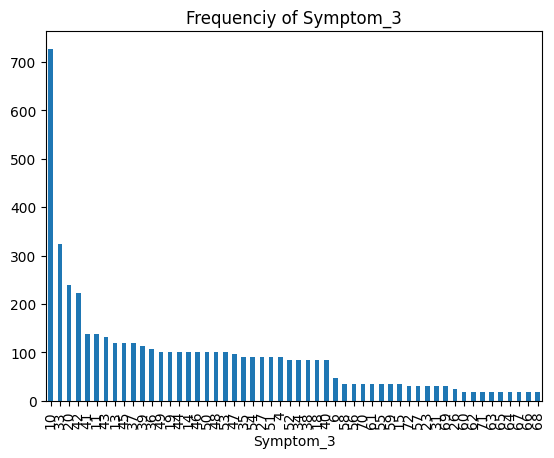

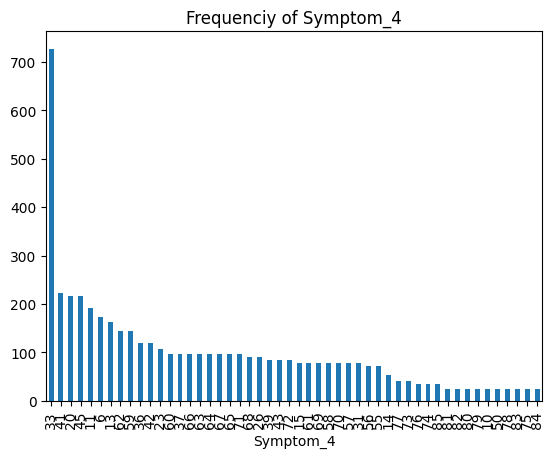

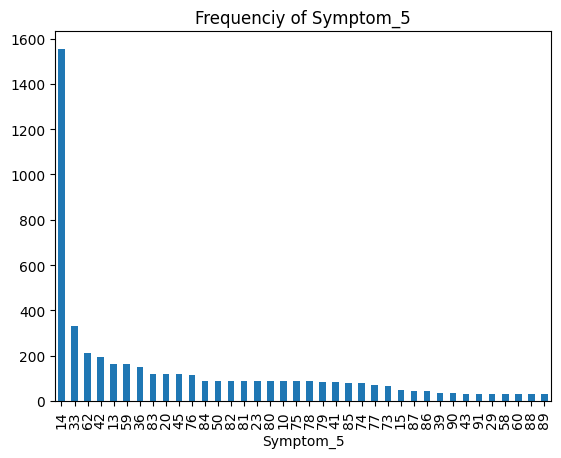

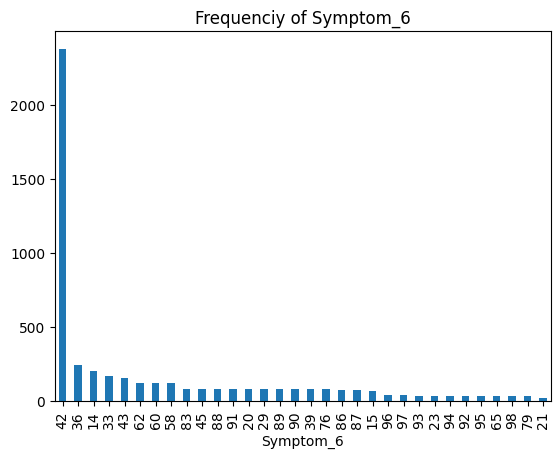

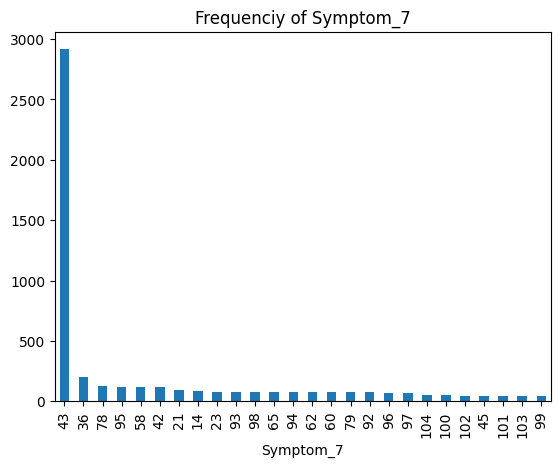

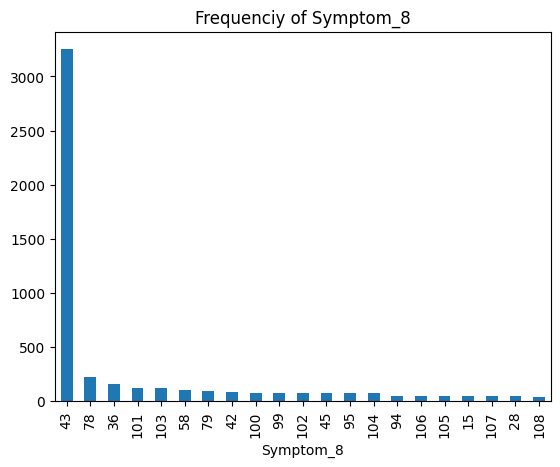

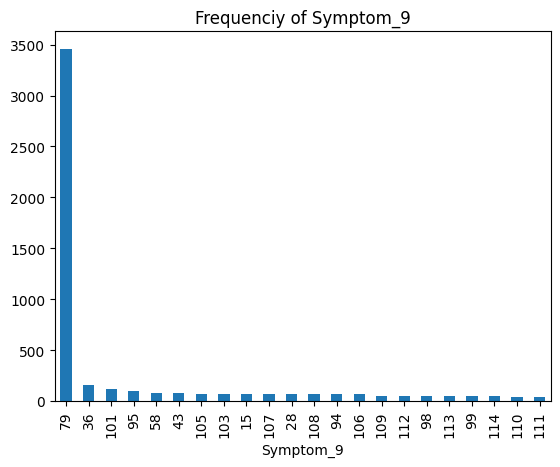

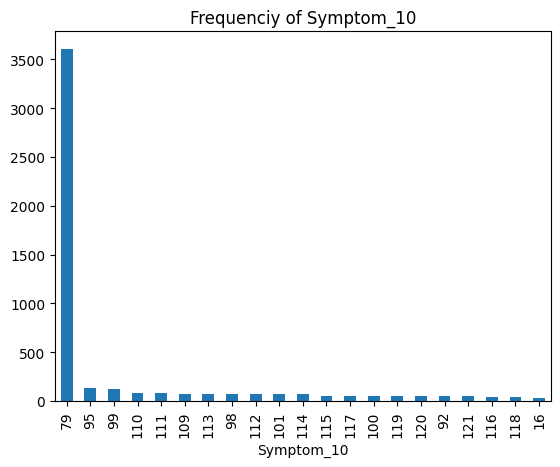

In [30]:
for i in range(1,11):
    dataset[f'Symptom_{i}'].value_counts().plot(kind='bar')
    plt.title(f'Frequenciy of Symptom_{i}')
    plt.show()

### Drop the 'Symptom_Count' and 'Symptom_Count_Z' columns

In [31]:
dataset = dataset.drop(['Symptom_Count', 'Symptom_Count_Z'], axis=1)

## Save the Encoded Dataset

In [32]:
dataset.to_csv('Datasets/final_dataset.csv', index=False)

# Display the first few rows of the encoded dataset
print("Encoded Dataset Preview:")
dataset.head()

Encoded Dataset Preview:


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10
0,15,0,1,34,55,14,42,43,43,79,79
1,15,1,34,55,33,14,42,43,43,79,79
2,15,0,34,55,33,14,42,43,43,79,79
3,15,0,1,55,33,14,42,43,43,79,79
4,15,0,1,34,33,14,42,43,43,79,79


In [33]:
final_dataset = pd.read_csv('Datasets/final_dataset.csv')
final_dataset.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10
0,15,0,1,34,55,14,42,43,43,79,79
1,15,1,34,55,33,14,42,43,43,79,79
2,15,0,34,55,33,14,42,43,43,79,79
3,15,0,1,55,33,14,42,43,43,79,79
4,15,0,1,34,33,14,42,43,43,79,79
5,15,1,34,55,33,14,42,43,43,79,79
6,15,0,34,55,33,14,42,43,43,79,79
7,15,0,1,55,33,14,42,43,43,79,79
8,15,0,1,34,33,14,42,43,43,79,79
9,15,0,1,34,55,14,42,43,43,79,79


## Save the Symptom mappings

In [45]:
with open('Pickle files/symptom_mappings.pkl', 'wb') as file:
    pickle.dump(symptom_mappings, file)

## Split the Data into Dependent and Independent variables

In [35]:
X = final_dataset.iloc[:, 1:]
y = final_dataset['Disease']

In [36]:
print(X)

      Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0             0          1         34         55         14         42   
1             1         34         55         33         14         42   
2             0         34         55         33         14         42   
3             0          1         55         33         14         42   
4             0          1         34         33         14         42   
...         ...        ...        ...        ...        ...        ...   
4915          6         14         42         68         59         90   
4916          1         30         51         69         14         42   
4917         31         32         52         70         14         42   
4918          1         19         53         71         84         91   
4919          1         33         54         72         85         42   

      Symptom_7  Symptom_8  Symptom_9  Symptom_10  
0            43         43         79          79  
1      

In [37]:
print(y)

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: Disease, Length: 4920, dtype: int64


## Split the data into training and testing sets 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Printing training values

In [39]:
print(X_train)

      Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
1807          0          1         10         41         33         14   
184          18          6         10         33         14         42   
205           0         10         41         62         36         43   
4581         10         24         46         65         82         89   
410           0          1         34         55         14         42   
...         ...        ...        ...        ...        ...        ...   
4426          1         19         53         71         84         91   
466           6          7         36         43         86         42   
3092          1         18         19          6         10         33   
3772          0          1         34         55         14         42   
860           0          1          4         31         73         42   

      Symptom_7  Symptom_8  Symptom_9  Symptom_10  
1807        101         94         95         115  
184    

In [40]:
print(y_train)

1807     8
184     37
205     19
4581    39
410     15
        ..
4426    35
466     33
3092    11
3772    15
860     14
Name: Disease, Length: 3936, dtype: int64


### Printing testing values

In [41]:
print(X_test)

      Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
373           1         51         69         33         14         42   
4916          1         30         51         69         14         42   
1550         10         26         11         37         45         58   
3081          8          9         33         57         14         42   
3857          0          6         20         42         36         43   
...         ...        ...        ...        ...        ...        ...   
1101         21         22         44         64         81         42   
4639          8          9         33         57         14         42   
3625          1         18         19          6         10         33   
378           1         30         69         33         14         42   
495           6         12         38         33         14         42   

      Symptom_7  Symptom_8  Symptom_9  Symptom_10  
373          43         43         79          79  
4916   

In [42]:
print(y_test)

373      2
4916     2
1550    24
3081     1
3857     9
        ..
1101    13
4639     1
3625    11
378      2
495     17
Name: Disease, Length: 984, dtype: int64
